In [1]:
import numpy as np

In [8]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

In [9]:
def net_input(X, w):
    return np.dot(X, w)

In [10]:
def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

In [11]:
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

In [12]:
logistic_activation(X, w)

0.8879529614430097

### testing output layer with multiple logistic activation units

In [14]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
            [0.2, 0.4, 1.0, 0.2],
            [0.6, 1.5, 1.2, 0.7]])
W

array([[1.1, 1.2, 0.8, 0.4],
       [0.2, 0.4, 1. , 0.2],
       [0.6, 1.5, 1.2, 0.7]])

In [15]:
A = np.array([[1, 0.1, 0.4, 0.6]])
A

array([[1. , 0.1, 0.4, 0.6]])

In [16]:
Z = np.dot(W, A[0])

In [17]:
y_probas = logistic(Z)
Z

array([1.78, 0.76, 1.65])

In [18]:
y_probas

array([0.85569687, 0.68135373, 0.83889105])

In [20]:
np.argmax(Z, axis = 0)

0

In [21]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [23]:
softmax(Z)

array([0.44668973, 0.16107406, 0.39223621])

In [24]:
Z

array([1.78, 0.76, 1.65])

In [25]:
# use tensorflow instead
import tensorflow as tf
Z_tensor = tf.expand_dims(Z, axis = 0)
Z_tensor

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[1.78, 0.76, 1.65]])>

In [27]:
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

In [28]:
# hyperbolic tangent / tanh
# has a broader spectrum in the open interval

In [29]:
import matplotlib.pyplot as plt

In [35]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

In [36]:
z = np.arange(-5,5, 0.005)
z

array([-5.   , -4.995, -4.99 , ...,  4.985,  4.99 ,  4.995])

In [37]:
log_act = logistic(z)
log_act

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [38]:
tanh_act = tanh(z)
tanh_act

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

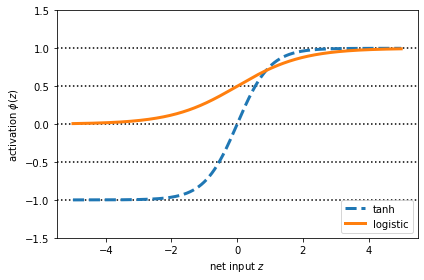

In [39]:
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,linewidth=3, linestyle='--',label='tanh')
plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [40]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [41]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

In [42]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [43]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])>

### Rectified linear unit activation